In [42]:
import pandas as pd

In [43]:
df = pd.read_csv('checkins.dat', sep='|', header = 0,
                 skipinitialspace = True)
df.dropna(inplace = True)
df.columns = [name.strip() for name in df.columns]
df = df.iloc[0 : 200000]
df

C:\Users\xiaom\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,user_id,venue_id,latitude,longitude,created_at
2,984222,15824.0,5222.0,38.895112,-77.036366,2012-04-21 17:43:47
4,984234,44652.0,5222.0,33.800745,-84.410520,2012-04-21 17:43:43
8,984291,105054.0,5222.0,45.523452,-122.676207,2012-04-21 17:39:22
10,984318,2146539.0,5222.0,40.764462,-111.904565,2012-04-21 17:35:46
11,984232,93870.0,380645.0,33.448377,-112.074037,2012-04-21 17:38:18
...,...,...,...,...,...,...
498253,212202,23019.0,671208.0,44.979965,-93.263836,2011-12-14 01:56:32
498255,212574,219266.0,7491.0,39.955593,-86.013873,2011-12-14 00:36:05
498256,212729,957829.0,46717.0,42.707035,-71.163114,2011-12-14 01:55:08
498257,734718,864870.0,11195.0,38.982228,-94.670792,2012-03-18 13:16:13


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

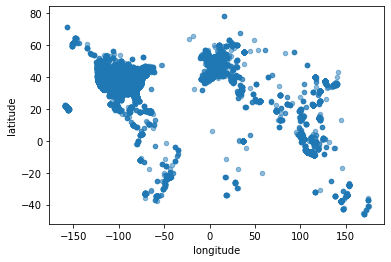

In [44]:
df.plot.scatter(x = 'longitude', y = 'latitude', alpha = 0.5)

In [45]:
from sklearn.cluster import MeanShift
clustering = MeanShift(bandwidth = 0.1)
clustering.fit(df[['latitude', 'longitude']])
cluster_centers_x = [el[1] for el in clustering.cluster_centers_]
cluster_centers_y = [el[0] for el in clustering.cluster_centers_]

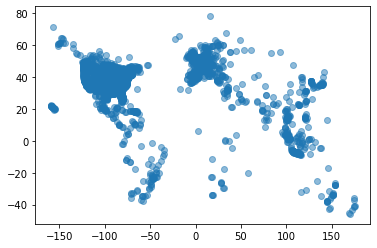

In [46]:
import matplotlib.pyplot as plt
plt.scatter(x = cluster_centers_x, y = cluster_centers_y, alpha = 0.5)

In [47]:
good_labels = []
for label in set(clustering.labels_):
    if len(clustering.labels_[clustering.labels_ == label]) >= 15:
        good_labels.append(label)

In [48]:
cluster_centers = pd.DataFrame({'longitude': cluster_centers_x,
                                'latitude': cluster_centers_y, 'label': range(len(cluster_centers_x))})
good_cluster_centers = cluster_centers[cluster_centers['label'].isin(
    good_labels)]
good_cluster_centers

,longitude,latitude,label
0,-73.989995,40.717320,0
1,-112.000910,33.449398,1
2,-87.629846,41.878206,2
3,-111.865940,33.385532,3
4,-77.048889,38.885769,4
...,...,...,...
1384,-78.643603,43.013808,1384
1386,-82.717989,42.692294,1386
2726,-80.187280,40.262570,2726
2803,-77.315812,37.523479,2803


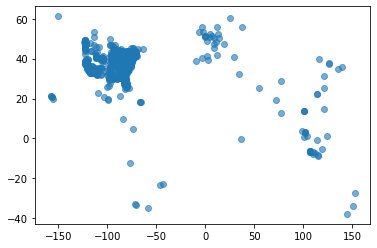

In [49]:
plt.scatter(x=good_cluster_centers['longitude'],
            y=good_cluster_centers['latitude'], alpha=0.6)

In [50]:
office_addresses = [
    [34.2720355, -118.4693734],
    [33.7507188, -118.1889072],
    [27.9450524, -82.4455656],
    [39.2650447, -76.6007999],
    [32.717609, -117.1761962],
    [37.804883, -122.4016302],
    [49.2514431, -123.1277804],
    [32.7859233, -79.9333731],
    [30.6860768, -88.0394999],
    [26.1216934, -80.1388889],
    [33.3882696, -111.6913768],
    [26.0853385, -80.1180988],
    [30.0068944, -90.1633797],
    [29.3075638, -94.7986193],
    [28.4157244, -80.6310168],
    [52.3787031, 4.8849274],
    [47.3831508, 8.4987319],
    [41.3905199, 2.1570719],
    [50.4356475, 30.5142909],
    [53.4699633, -2.2947828]
]

In [51]:
closest_centers = []
min_distance = 2000
closest_center = [1000, 1000]
for address in office_addresses:
    best_distance = 2000
    closest_centers.append([1000, 1000])
    for i in range(len(good_cluster_centers)):
        distance = (address[0] - good_cluster_centers.iloc[i, 1]) ** 2 + \
            (address[1] - good_cluster_centers.iloc[i, 0]) ** 2
        if distance < best_distance:
            best_distance = distance
            closest_centers[-1] = [good_cluster_centers.iloc[i, 1],
                                good_cluster_centers.iloc[i, 0]]
    if best_distance < min_distance:
        closest_center = closest_centers[-1]
        min_distance = best_distance
closest_centers

[[34.196007448338456, -118.55005310241734],
 [33.81249046885486, -118.13715305221267],
 [27.949487833223188, -82.46495528701965],
 [39.28722942097766, -76.61349781776188],
 [32.70981906967179, -117.15149130993028],
 [37.78613136046222, -122.42406656710145],
 [49.240204477747305, -123.11168844368241],
 [32.789419742774626, -79.92540948150294],
 [30.695467679999997, -88.04394997000006],
 [26.10746111802706, -80.16129293571461],
 [33.415048500000005, -111.54957770000007],
 [26.10746111802706, -80.16129293571461],
 [29.986724518292693, -90.20437442560984],
 [29.529337903703706, -95.09414072222225],
 [28.324667917500005, -80.66757221999997],
 [52.37288348484852, 4.892400727272723],
 [47.391517436363635, 8.539223845454547],
 [41.375373932142864, 2.1479214392857133],
 [55.75004057500001, 37.621801785937535],
 [53.480651852941165, -2.2349982941176476]]

In [52]:
closest_center

[32.789419742774626, -79.92540948150294]